In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
netflix = pd.read_csv('data/netflix_titles.csv')

In [3]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,23-Dec-16,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,20-Dec-18,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,16-Nov-17,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,01-Jan-20,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
print('Number of rows: ', netflix.shape[0])
print('Number of columns: ', netflix.shape[1])

Number of rows:  7787
Number of columns:  12


In [6]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [7]:
netflix.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [8]:
# values = {'director': 'None','cast': 'None','country': 'None','date_added': ,'rating': }
columns = ['show_id', 'type', 'title', 'director', 'cast', 'country','release_year', 'rating', 'duration', 'listed_in', 'description']
netflix[columns] = netflix[columns].fillna('None')
netflix['date_added'] = netflix['date_added'].fillna(0)

In [9]:
netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [10]:
# netflix['country'].str.split(',', expand=True)
netflix = pd.concat([netflix, netflix['country'].str.split(',', expand=True)], axis=1)
netflix = netflix.drop(columns={'country'})
netflix = netflix.rename(columns={0: 'country', 1: 'country2', 2: 'country3', 3: 'country4', 4: 'country5', 5: 'country6', 6: 'country7', 7: 'country8', 8: 'country9', 9: 'country10', 10: 'country11', 11: 'country12'})

netflix = pd.concat([netflix, netflix['cast'].str.split(',', expand=True)], axis=1)
netflix = netflix.drop(columns={'cast'})
netflix = netflix.rename(columns={0: 'cast', 1: 'cast2', 2: 'cast3', 3: 'cast4', 4: 'cast5', 5: 'cast6'
                        , 6: 'cast7', 7: 'cast8', 8: 'cast9', 9: 'cast10', 10: 'cast11', 11: 'cast12'
                        , 12: 'cast13', 13: 'cast14', 14: 'cast15', 15: 'cast16', 16: 'cast17', 17: 'cast18'
                        , 18: 'cast19', 19: 'cast20', 20: 'cast21', 21: 'cast22', 22: 'cast23', 23: 'cast24'
                        , 24: 'cast25', 25: 'cast26', 26: 'cast27', 27: 'cast28', 28: 'cast29', 29: 'cast30'
                        , 30: 'cast31', 31: 'cast32', 32: 'cast33', 33: 'cast34', 34: 'cast35', 35: 'cast36'
                        , 36: 'cast37', 37: 'cast38', 38: 'cast39', 39: 'cast40', 40: 'cast41', 41: 'cast42'
                        , 42: 'cast43', 43: 'cast44', 44: 'cast45', 45: 'cast46', 46: 'cast47', 47: 'cast48'
                        , 48: 'cast49', 49: 'cast50'})

column_names=['show_id', 'type', 'title', 'director', 'cast', 'cast2', 'cast3', 'cast4', 'cast5', 'cast6', 'cast7', 'cast8', 'cast9', 'cast10',
               'cast11', 'cast12', 'cast13', 'cast14', 'cast15', 'cast16', 'cast17', 'cast18', 'cast19',
               'cast20', 'cast21', 'cast22', 'cast23', 'cast24', 'cast25', 'cast26', 'cast27', 'cast28',
               'cast29', 'cast30', 'cast31', 'cast32', 'cast33', 'cast34', 'cast35', 'cast36', 'cast37',
               'cast38', 'cast39', 'cast40', 'cast41', 'cast42', 'cast43', 'cast44', 'cast45', 'cast46',
               'cast47', 'cast48', 'cast49', 'cast50', 'country', 'country2', 'country3', 
               'country4', 'country5', 'country6', 'country7', 
               'country8', 'country9', 'country10', 'country11', 
               'country12', 'date_added', 'release_year',
               'rating', 'duration']

netflix = netflix.reindex(columns=column_names)
# netflix.head()

In [11]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'cast2', 'cast3',
       'cast4', 'cast5', 'cast6', 'cast7', 'cast8', 'cast9', 'cast10',
       'cast11', 'cast12', 'cast13', 'cast14', 'cast15', 'cast16', 'cast17',
       'cast18', 'cast19', 'cast20', 'cast21', 'cast22', 'cast23', 'cast24',
       'cast25', 'cast26', 'cast27', 'cast28', 'cast29', 'cast30', 'cast31',
       'cast32', 'cast33', 'cast34', 'cast35', 'cast36', 'cast37', 'cast38',
       'cast39', 'cast40', 'cast41', 'cast42', 'cast43', 'cast44', 'cast45',
       'cast46', 'cast47', 'cast48', 'cast49', 'cast50', 'country', 'country2',
       'country3', 'country4', 'country5', 'country6', 'country7', 'country8',
       'country9', 'country10', 'country11', 'country12', 'date_added',
       'release_year', 'rating', 'duration'],
      dtype='object')

In [12]:
netflix.head()

,show_id,type,title,director,cast,cast2,cast3,cast4,cast5,cast6,...,country7,country8,country9,country10,country11,country12,date_added,release_year,rating,duration
0,s1,TV Show,3%,None,João Miguel,Bianca Comparato,Michel Gomes,Rodolfo Valente,Vaneza Oliveira,Rafael Lozano,...,None,None,None,None,None,None,14-Aug-20,2020,TV-MA,4 Seasons
1,s2,Movie,7:19,Jorge Michel Grau,Demián Bichir,Héctor Bonilla,Oscar Serrano,Azalia Ortiz,Octavio Michel,Carmen Beato,...,None,None,None,None,None,None,23-Dec-16,2016,TV-MA,93 min
2,s3,Movie,23:59,Gilbert Chan,Tedd Chan,Stella Chung,Henley Hii,Lawrence Koh,Tommy Kuan,Josh Lai,...,None,None,None,None,None,None,20-Dec-18,2011,R,78 min
3,s4,Movie,9,Shane Acker,Elijah Wood,John C. Reilly,Jennifer Connelly,Christopher Plummer,Crispin Glover,Martin Landau,...,None,None,None,None,None,None,16-Nov-17,2009,PG-13,80 min
4,s5,Movie,21,Robert Luketic,Jim Sturgess,Kevin Spacey,Kate Bosworth,Aaron Yoo,Liza Lapira,Jacob Pitts,...,None,None,None,None,None,None,01-Jan-20,2008,PG-13,123 min


In [13]:
year_movie = netflix.groupby(['release_year'], as_index=False)['show_id'].count()
year_movie = year_movie.rename(columns={'show_id': 'launched movies'})
year_movie = year_movie.sort_values(['launched movies'], ascending = False)

# year_movie = year_movie.sort_values(['release_year'], ascending = True)

year_movie = year_movie.nlargest(10, 'launched movies')
year_movie = year_movie.sort_values(['release_year'], ascending = True)
year_movie

,release_year,launched movies
61,2010,173
63,2012,219
64,2013,267
65,2014,334
66,2015,541
67,2016,882
68,2017,1012
69,2018,1121
70,2019,996
71,2020,868


In [14]:
netflix.loc[:50, 'country':'country12']

,country,country2,country3,country4,country5,country6,country7,country8,country9,country10,country11,country12
0,Brazil,None,None,None,None,None,None,None,None,None,None,None
1,Mexico,None,None,None,None,None,None,None,None,None,None,None
2,Singapore,None,None,None,None,None,None,None,None,None,None,None
3,United States,None,None,None,None,None,None,None,None,None,None,None
4,United States,None,None,None,None,None,None,None,None,None,None,None
5,Turkey,None,None,None,None,None,None,None,None,None,None,None
6,Egypt,None,None,None,None,None,None,None,None,None,None,None
7,United States,None,None,None,None,None,None,None,None,None,None,None
8,India,None,None,None,None,None,None,None,None,None,None,None
9,India,None,None,None,None,None,None,None,None,None,None,None


In [15]:
netflix['country2'] = netflix['country2'].str.lstrip()
netflix['country3'] = netflix['country3'].str.lstrip()
netflix['country4'] = netflix['country4'].str.lstrip()
netflix['country5'] = netflix['country5'].str.lstrip()
netflix['country6'] = netflix['country6'].str.lstrip()
netflix['country7'] = netflix['country7'].str.lstrip()
netflix['country8'] = netflix['country8'].str.lstrip()
netflix['country9'] = netflix['country9'].str.lstrip()
netflix['country10'] = netflix['country10'].str.lstrip()
netflix['country11'] = netflix['country11'].str.lstrip()
netflix['country12'] = netflix['country12'].str.lstrip()

# netflix['country2'].value_counts().to_dict()
# print(country[country.country == 'India'])
# print(country2[country2.country == 'India'])

# print(country[country.country == 'Singapore'])
# print(country2[country2.country == 'Singapore'])

# print(country[country.country == 'Spain'])
# print(country2[country2.country == 'Spain'])

print(country[country.country == 'United Kingdom'])
print(country2[country2.country == 'United Kingdom'])

country3

NameError: name 'country' is not defined

In [16]:
country = netflix.country.value_counts().reset_index()
country = country.rename(columns={'index': 'country', 'country': 'number'})

country2 = netflix.country2.value_counts().reset_index()
country2 = country2.rename(columns={'index': 'country', 'country2': 'number2'})

country3 = netflix.country3.value_counts().reset_index()
country3 = country3.rename(columns={'index': 'country', 'country3': 'number3'})

country4 = netflix.country4.value_counts().reset_index()
country4 = country4.rename(columns={'index': 'country', 'country4': 'number4'})

country5 = netflix.country5.value_counts().reset_index()
country5 = country5.rename(columns={'index': 'country', 'country5': 'number5'})

country6 = netflix.country6.value_counts().reset_index()
country6 = country6.rename(columns={'index': 'country', 'country6': 'number6'})

country7 = netflix.country7.value_counts().reset_index()
country7 = country7.rename(columns={'index': 'country', 'country7': 'number7'})

country8 = netflix.country8.value_counts().reset_index()
country8 = country8.rename(columns={'index': 'country', 'country8': 'number8'})

country9 = netflix.country9.value_counts().reset_index()
country9 = country9.rename(columns={'index': 'country', 'country9': 'number9'})

country10 = netflix.country10.value_counts().reset_index()
country10 = country10.rename(columns={'index': 'country', 'country10': 'number10'})

country11 = netflix.country11.value_counts().reset_index()
country11 = country11.rename(columns={'index': 'country', 'country11': 'number11'})

country12 = netflix.country12.value_counts().reset_index()
country12 = country12.rename(columns={'index': 'country', 'country12': 'number12'})

# country2

# country['number'] + country2['number2'] + country3['number3'] + country4['number4'] + country5['number5'] + country6['number6'] + country7['number7'] + country8['number8'] + country9['number9'] + country10['number10'] + country11['number11'] + country12['number12']
# country['number'] + country2
# countries = pd.concat([country, country2], axis=0, join='outer')
# countries = pd.concat([countries, country3], axis=0, join='outer')
# countries = pd.concat([countries, country4], axis=0, join='outer')
# countries = pd.concat([countries, country5], axis=0, join='outer')
# countries = pd.concat([countries, country6], axis=0, join='outer')
# countries = pd.concat([countries, country7], axis=0, join='outer')
# countries = pd.concat([countries, country8], axis=0, join='outer')
# countries = pd.concat([countries, country9], axis=0, join='outer')
# countries = pd.concat([countries, country10], axis=0, join='outer')
# countries = pd.concat([countries, country11], axis=0, join='outer')
# countries = pd.concat([countries, country12], axis=0, join='outer')

# country2['country'] = country2['country'].str.lstrip()

countries = pd.merge(country, country2, how='outer', on='country')
countries = pd.merge(countries, country3, how='outer', on='country')
countries = pd.merge(countries, country4, how='outer', on='country')
countries = pd.merge(countries, country5, how='outer', on='country')
countries = pd.merge(countries, country6, how='outer', on='country')
countries = pd.merge(countries, country7, how='outer', on='country')
countries = pd.merge(countries, country8, how='outer', on='country')
countries = pd.merge(countries, country9, how='outer', on='country')
countries = pd.merge(countries, country10, how='outer', on='country')
countries = pd.merge(countries, country11, how='outer', on='country')
countries = pd.merge(countries, country12, how='outer', on='country')

countries = countries.fillna(0)

col_list = list(countries)
col_list.remove('country')
countries['numbers'] = countries[col_list].sum(axis=1)

countries = countries.drop(columns={'number', 'number2', 'number3', 'number4', 'number5', 'number6',
                        'number7', 'number8', 'number9', 'number10', 'number11', 'number12'})
countries = countries.sort_values('numbers', ascending = False)
countries = countries.reset_index()
countries = countries.drop(columns={'index'})
# countries = countries.head()
countries = countries.drop([3])
countries = countries.head()
countries

# countries.groupby(['country']).sum()

# countries[countries.country == 'United States']

# country['number'] + country2['number2']

# countries = countries.reset_index()
# countries = countries.drop(columns={'index'})
# countries.groupby(['country']).sum()
# countries.groupby(['country'])[['number','number2','number3','number4','number5','number6','number7','number8','number9','number10','number11','number12']].sum()
# countries['number'] + countries['number2']
# country[country.country == 'Uruguay']
# country[country.country == 'Si']

,country,numbers
0,United States,3297.0
1,India,990.0
2,United Kingdom,723.0
4,Canada,412.0
5,France,349.0


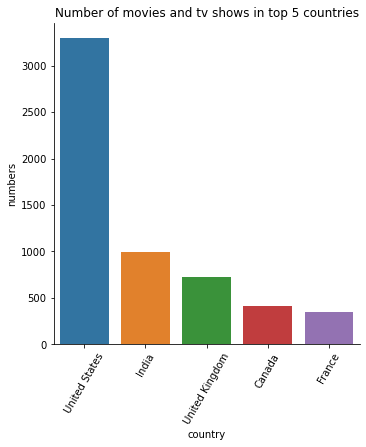

In [17]:
movie = sns.catplot(data=countries,
                    kind='bar',
                    x='country', y='numbers'
                    ).set(title='Number of movies and tv shows in top 5 countries').set_xticklabels(rotation=60)
# for index, row in countries.iterrows():
#     movie.text(row.country,row.numbers, round(row.numbers,2), color='black', ha="center")

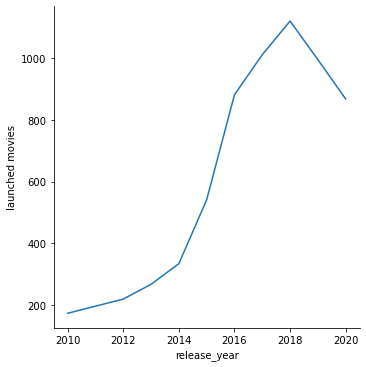

In [18]:
launched_movies_plot = sns.relplot(data=year_movie,
                                   kind='line',
                                   x='release_year', y='launched movies',
                             )
launched_movies_plot

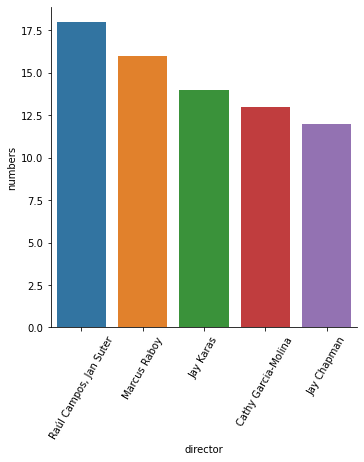

In [19]:
director = netflix.groupby(['director'])['show_id'].count().sort_values(ascending=False)
director = director.drop('None')

director = director.reset_index()
director = director.rename(columns={'show_id': 'numbers'})


director = director.head()

director_plot = sns.catplot(data=director,
                            kind='bar',
                            x='director', y='numbers')

director_plot.set_xticklabels(rotation=60)

In [20]:
type_movie = netflix[['show_id', 'type']]
type_movie = type_movie.groupby(['type']).count()
type_movie = type_movie.reset_index()
type_movie = type_movie.rename(columns={'show_id': 'numbers'})
type_movie

,type,numbers
0,Movie,5377
1,TV Show,2410


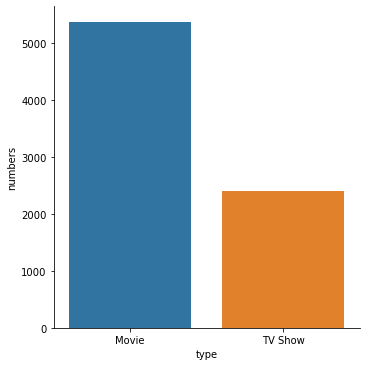

In [21]:
type_plot = sns.catplot(data=type_movie,
                        kind='bar',
                        x='type', y='numbers'
                        )

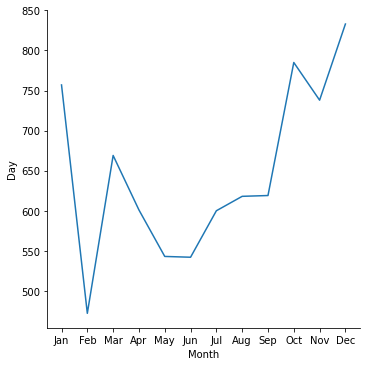

In [22]:
columns_date = ['Month', 'Day', 'Year']

date = netflix['date_added'].str.split('-', expand=True)
# date = netflix['date_added'].str.split(' ', expand=True)

date = date.rename(columns={0: 'Day', 1: 'Month', 2: 'Year'})
# date['Year'] = date['Year'] + 2000
# date = date.drop(columns={3})
# date[0] = date[0].str.split(' ', expand=True)
# date[date.isnull().any(axis=1)]
# date = date.groupby(['Month', 'Day']).count()
# date['Month'] = date['Month'].str.split(' ', expand=True) 


# date = pd.concat(['monthday', 'date'], axis=1)
# date = pd.merge(monthday, date)

for i in columns_date:
    date[i] = date[i].str.lstrip()
    date[i] = date[i].replace(np.nan, 0)
#     date[i] = date[i].astype(str).astype(int)

date['Day'] = date['Day'].astype(str).astype(int)
date['Year'] = date['Year'].astype(str).astype(int)
date['Year'] = date['Year'] + 2000
month = date.groupby(['Month'])['Day'].count()
# month = month.drop(columns={'Year'})
month = month.drop([0])
month = month.reset_index()

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

dummy = pd.Series(months, name='Month').to_frame()

sorted_months = pd.merge(dummy, month, on='Month', how='left')
sorted_months


sns.relplot(data=sorted_months, kind='line', x='Month', y='Day', sort=False)
# date[date['Month'] == 'Nov']
# date[date['Day'] == 'Aug']
    
# date.loc[284]
# date[date.Day == 'August']
# date[date.Day == 'August']
# date[date.isnull().any(axis=1)]
# date['Day'] = date['Day'].astype(str).astype(int)
# date[date['Day'] == 'January']

# date['Year'] = date['Year'].astype(str).astype(float)

# date[date['Day'] == 'September']


# date['Day'].isnull().sum()
# date = date.drop(columns={'Day', 'Year'})

# date = pd.concat([date, date.groupby(['Day']).count()], axis=1)

# date.dtypes
# date = date.reset_index()
# date = date.sort_values(['Day'], ascending=True)
# date['Month']

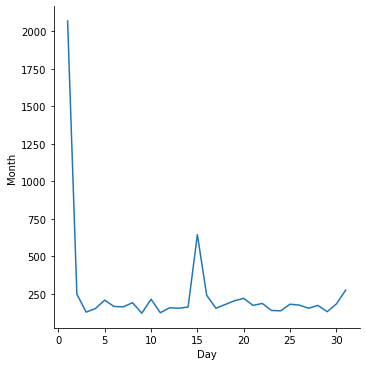

In [23]:
day = date.groupby(['Day'])['Month'].count().to_frame().reset_index()
day = day.drop([0])
sns.relplot(data=day, kind='line', x='Day', y='Month')

C:\Users\Z-Service\Anaconda3\lib\site-packages\pandas\core\indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


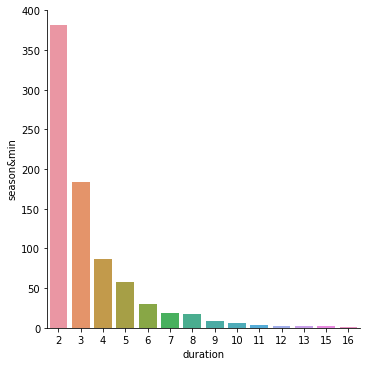

In [24]:
season_min = netflix['duration'].to_frame()
season_min = season_min['duration'].str.split(' ', expand=True)
season_min = season_min.rename(columns={0: 'duration', 1:'season&min'})
season = season_min[(season_min['season&min'] == 'Season') | (season_min['season&min'] == 'Seasons')]

season.loc[:, 'season&min'] = 'Seasons'


# season['duration'].unique()
season.loc[:, 'duration'] = season['duration'].astype(str).astype(int)

season_no = season.groupby(['duration'])['season&min'].count().to_frame().reset_index()

season_no = season_no.loc[1:, ]
# season_no
sns.catplot(data=season_no, kind='bar', x='duration', y='season&min')

C:\Users\Z-Service\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Text(0.5, 1.0, 'Duration distribution, mean: 99.3, std: 28.5')

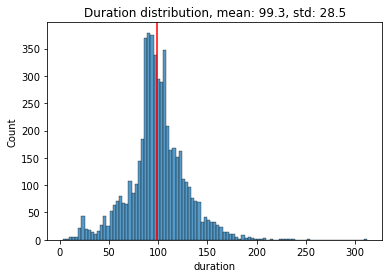

In [66]:
''' Refer to Kaggle: https://www.kaggle.com/hrcscience/eda-on-netflix-data '''

minute = season_min[season_min['season&min'] == 'min']
# minute = minute.groupby(['duration'])['season&min'].count().to_frame().reset_index()
# minute = minute.sort_values('season&min', ascending=False)
# minute.head(10)
minute['duration'] = minute['duration'].astype(str).astype('int64')
# minute.dtypes
mean, std = norm.fit(minute['duration'])
sns.histplot(x='duration', data=minute)
plt.axvline(x=mean, color='r', linestyle='-')
plt.title('Duration distribution, mean: %.1f, std: %.1f' %(mean, std))
# sns.displot(x='duration', data=minute)
# minute

In [34]:
minute

,duration,season&min
191,90,136
194,93,131
192,91,125
195,94,125
196,95,119
...,...,...
122,253,1
127,3,1
130,312,1
135,36,1
